In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import keras
import math
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline


In [2]:
df = pd.read_csv('Dataset.csv')

In [3]:
df1 = df.reset_index()['hourly_traffic_count']
df1.head()

0     3
1    16
2     9
3    12
4    19
Name: hourly_traffic_count, dtype: int64

In [4]:
df1 = df1.iloc[:9792,]
df1.tail()

9787    23
9788    25
9789    16
9790    18
9791    25
Name: hourly_traffic_count, dtype: int64

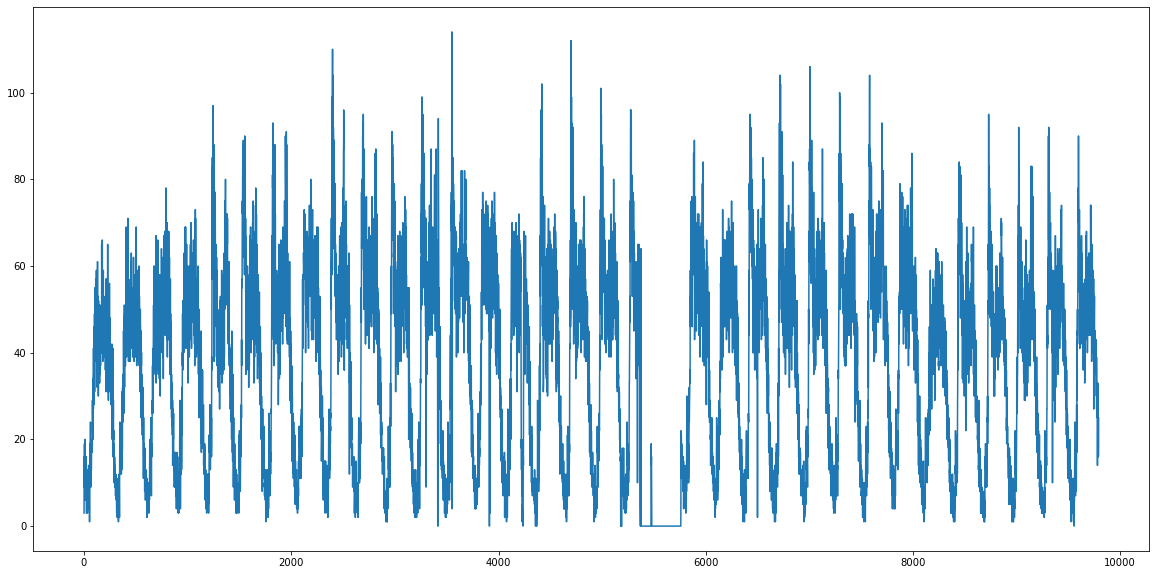

In [5]:
plt.figure(figsize=(20,10))
plt.plot(df1)
plt.show()

In [6]:
def create_dataset(dataset, window=1):
    dataX, dataY= [], []
    for i in range(len(dataset)-window-1):
        a = dataset[i:(i+window),0]
        dataX.append(a)
        dataY.append(dataset[i+window,0])
    return np.array(dataX), np.array(dataY)

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
df1.shape

(9792, 1)

In [9]:
training_size = int(len(df1)*0.80)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [10]:
window = 288
X_train,y_train = create_dataset(train_data,window)
X_test, y_test = create_dataset(test_data,window)

In [11]:
model = Sequential()
model.add(Dense(40, input_dim=window, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))

In [12]:
opt  = keras.optimizers.Adagrad(learning_rate = 0.05)

In [13]:
model.compile(optimizer=opt ,loss='mean_squared_error')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                11560     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2050      
_________________________________________________________________
dense_2 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 41        
Total params: 15,691
Trainable params: 15,691
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
755/755 [==============================] - 1s 2ms/step - loss: 0.0090
Epoch 2/100
755/755 [==============================] - 1s 2ms/step - loss: 0.0062
Epoch 3/100
755/755 [==============================] - 1s 2ms/step - loss: 0.0056
Epoch 4/100
755/755 [==============================] - 1s 2ms/step - loss: 0.0054
Epoch 5/100
755/755 [==============================] - 1s 2ms/step - loss: 0.0052
Epoch 6/100
755/755 [==============================] - 1s 2ms/step - loss: 0.0050
Epoch 7/100
755/755 [==============================] - 1s 2ms/step - loss: 0.0050
Epoch 8/100
755/755 [==============================] - 1s 2ms/step - loss: 0.0049
Epoch 9/100
755/755 [==============================] - 1s 2ms/step - loss: 0.0049
Epoch 10/100
755/755 [==============================] - 1s 2ms/step - loss: 0.0048
Epoch 11/100
755/755 [==============================] - 1s 2ms/step - loss: 0.0047
Epoch 12/100
755/755 [==============================] - 1s 2ms/step - loss: 0.0046
Epoch 13/100


755/755 [==============================] - 1s 2ms/step - loss: 0.0031
Epoch 100/100
755/755 [==============================] - 1s 2ms/step - loss: 0.0031


In [16]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [17]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [19]:
train_predict = train_predict.astype(int)
test_predict = test_predict.astype(int)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [20]:
train_predict,y_train

(array([[18],
        [18],
        [17],
        ...,
        [ 9],
        [10],
        [ 9]]),
 array([[13],
        [19],
        [10],
        ...,
        [10],
        [ 7],
        [12]]))

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('RMSE-train:',math.sqrt(mean_squared_error(y_train,train_predict)))
print('MAE-train:',mean_absolute_error(y_train,train_predict))
print('R_2-train:',r2_score(y_train,train_predict))

RMSE-train: 6.8644271830526105
MAE-train: 5.086956521739131
R_2-train: 0.9170175671215501


In [22]:
print('RMSE-test:',math.sqrt(mean_squared_error(y_test,test_predict)))
print('MAE-test:',mean_absolute_error(y_test,test_predict))
print('R_2-train:',r2_score(y_test,test_predict))

RMSE-test: 7.969778244685424
MAE-test: 5.9652694610778445
R_2-train: 0.8419969245662752


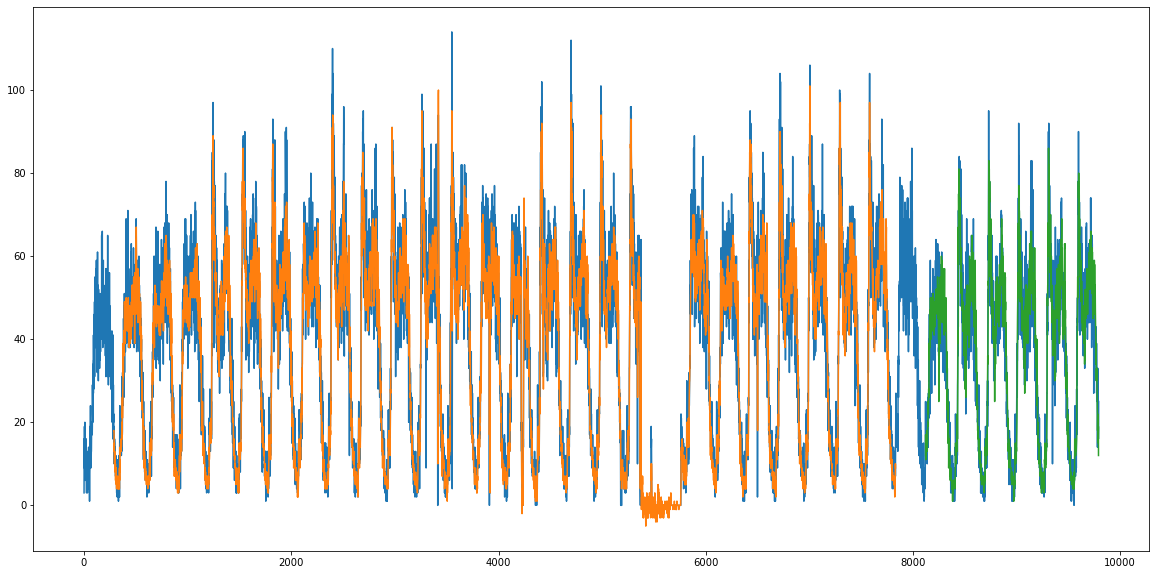

In [23]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[window:len(train_predict)+window, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(window*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()